# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r"C:\Users\rrubel\Documents\Materials\section03\dsc-1-03-16-eda-with-pandas-using-the-boston-housing-data-lab-online-ds-sp-000\all\train.csv")
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [2]:
print("The first pair of subsets I created is the nitrogen oxide concentration level of properties that bound the Charles River and properties that do not. I would expect the nitrogen oxide levels of properties close to the river to have a higher mean. Nitrogen oxide is released during fuel combustion, so I would expect this to occur more frequently in higher density industrial areas on the Charles River when compared to more rural areas.")
print()
print("The second pair of subsets I created is the pupil-teacher ratio where the median value of owner-occupied homes is greater than $250,000 vs the pupil-teacher ratio where the median value of owner-occupied homes is less than $174,000. These are the first and third quartile of median home values respectively. I would expect the pupil-teacher ratio to be lower in towns where the median home value is higher. School districts in higher income areas can afford to have less students per teacher.")
print()
print("The third pair of subsets I created is the per capita crime rate where the average number of rooms per dwelling is greater than 6.5 and the per capita crime rate where the average number of rooms per dwelling is less than 5.8. These are the first and third quartile of median home values respectively. I would expect the crime rate to be higher in areas where dwellings have fewer rooms. Higher income areas with less crime usually are accompanied with bigger properties with a lot of rooms.")

The first pair of subsets I created is the nitrogen oxide concentration level of properties that bound the Charles River and properties that do not. I would expect the nitrogen oxide levels of properties close to the river to have a higher mean. Nitrogen oxide is released during fuel combustion, so I would expect this to occur more frequently in higher density industrial areas on the Charles River when compared to more rural areas.

The second pair of subsets I created is the pupil-teacher ratio where the median value of owner-occupied homes is greater than $250,000 vs the pupil-teacher ratio where the median value of owner-occupied homes is less than $174,000. These are the first and third quartile of median home values respectively. I would expect the pupil-teacher ratio to be lower in towns where the median home value is higher. School districts in higher income areas can afford to have less students per teacher.

The third pair of subsets I created is the per capita crime rate wher

In [134]:
%matplotlib notebook
plt.style.use("bmh")

In [55]:
df_charles = df.loc[df["chas"] == 1, "nox"]
df_notcharles = df.loc[df["chas"] == 0, "nox"]

In [27]:
df_highval = df.loc[df["medv"] >= 25, "ptratio"]
df_lowval = df.loc[df["medv"] <= 17.4, "ptratio"]

In [132]:
df_highroom = df.loc[df["rm"] > 6.5, "crim"]
df_lowroom = df.loc[df["rm"] < 5.8, "crim"]

<IPython.core.display.Javascript object>


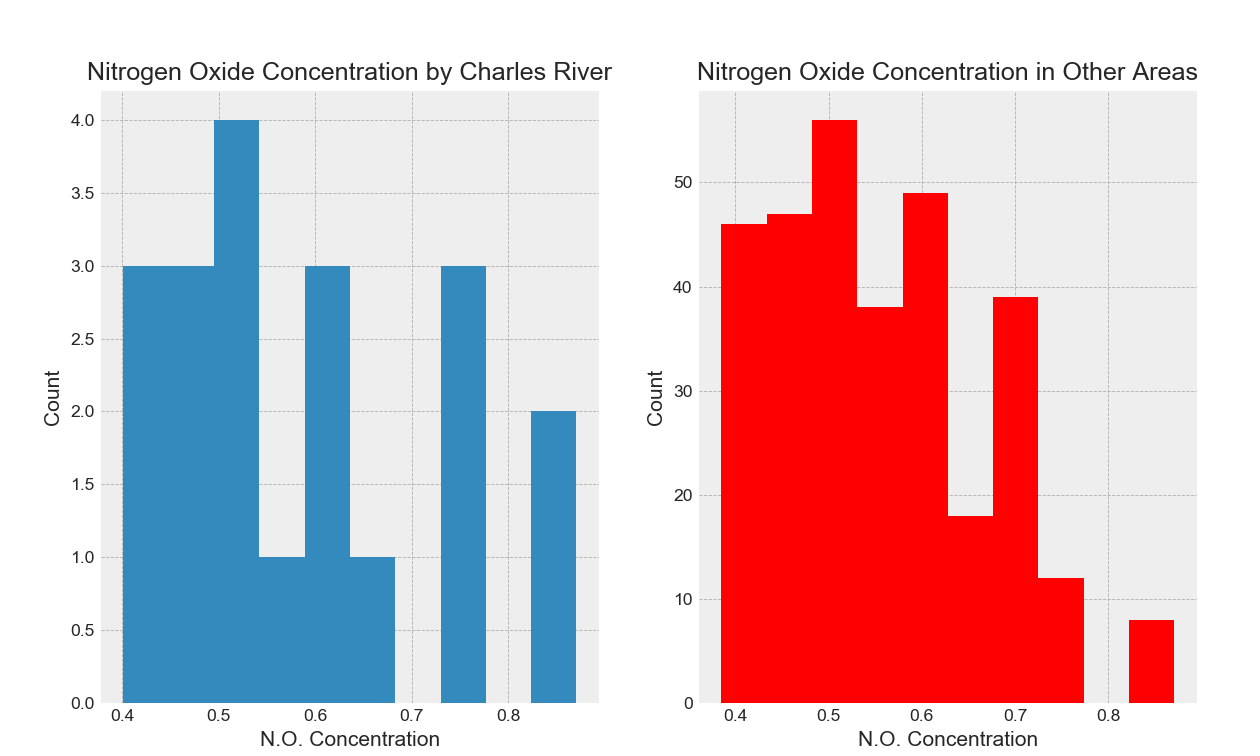

Text(0,0.5,'Count')

In [125]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
ax1.hist(df_charles)
ax2.hist(df_notcharles, color ="red")
ax1.set_title("Nitrogen Oxide Concentration by Charles River")
ax2.set_title("Nitrogen Oxide Concentration in Other Areas")
ax1.set_xlabel("N.O. Concentration")
ax2.set_xlabel("N.O. Concentration")
ax1.set_ylabel("Count")
ax2.set_ylabel("Count")

<IPython.core.display.Javascript object>


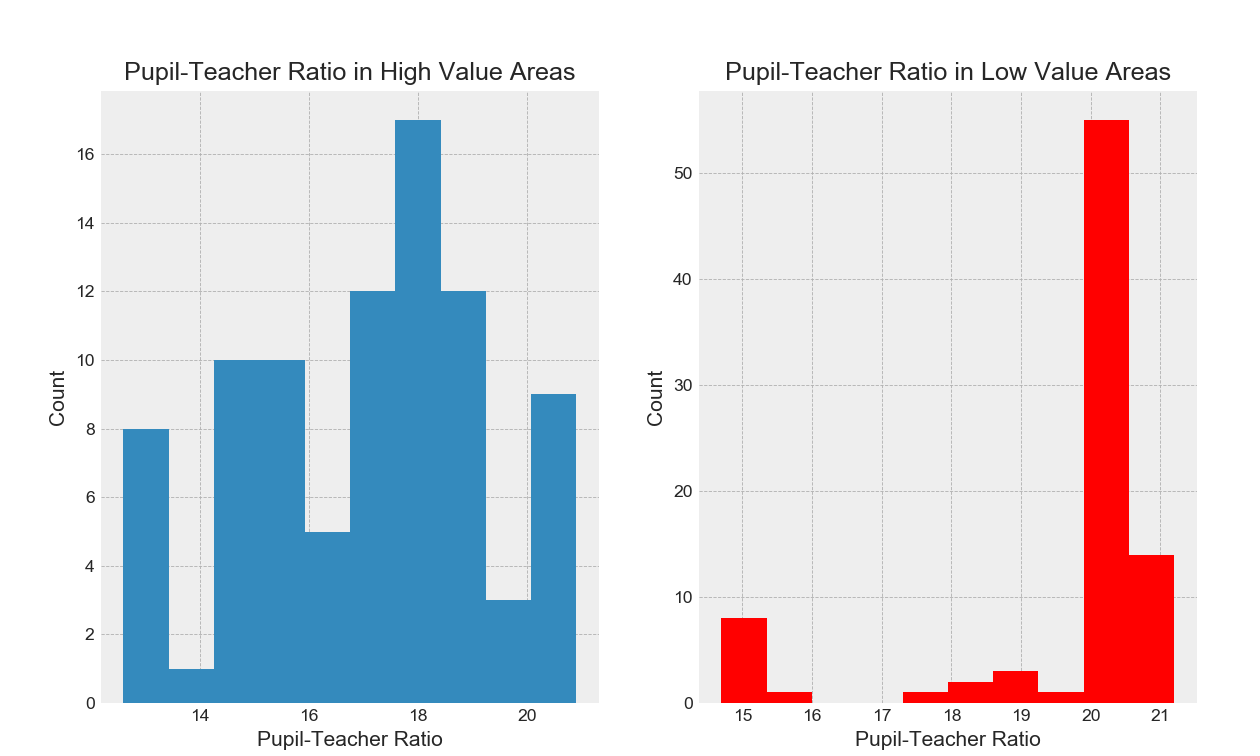

Text(0,0.5,'Count')

In [124]:
fig1 = plt.figure(figsize=(10,6))
ax3 = fig1.add_subplot(121)
ax4 = fig1.add_subplot(122)
ax3.hist(df_highval)
ax4.hist(df_lowval, color ="red")
ax3.set_title("Pupil-Teacher Ratio in High Value Areas")
ax4.set_title("Pupil-Teacher Ratio in Low Value Areas")
ax3.set_xlabel("Pupil-Teacher Ratio")
ax4.set_xlabel("Pupil-Teacher Ratio")
ax3.set_ylabel("Count")
ax4.set_ylabel("Count")

<IPython.core.display.Javascript object>


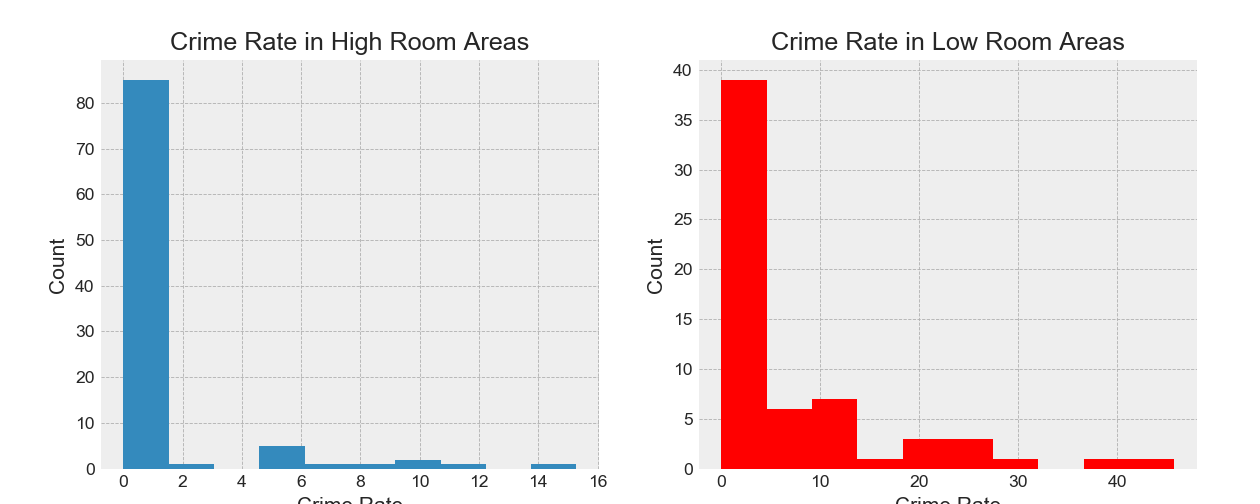

Text(0,0.5,'Count')

In [133]:
fig1 = plt.figure(figsize=(10,4))
ax5 = fig1.add_subplot(121)
ax6 = fig1.add_subplot(122)
ax5.hist(df_highroom)
ax6.hist(df_lowroom, color ="red")
ax5.set_title("Crime Rate in High Room Areas")
ax6.set_title("Crime Rate in Low Room Areas")
ax5.set_xlabel("Crime Rate")
ax6.set_xlabel("Crime Rate")
ax5.set_ylabel("Count")
ax6.set_ylabel("Count")

In [143]:
print("Although there are some outliers, the nitrogen oxide levels do not seem to be significantly higher in areas along the Charles River")
print()
print("The pupil-teacher ratio in areas of high value homes is, on average, about 2-3 less than areas with comparatively lower values")
print()
print("Although the majority of the data for both datasets fall in the same range, there are some areas with crime rate per capita above 15 in the low room subset that is causing the mean to be significantly higher")

Although there are some outliers, the nitrogen oxide levels do not seem to be significantly higher in areas along the Charles River

The pupil-teacher ratio in areas of high value homes is, on average, about 2-3 less than areas with comparatively lower values

Although the majority of the data for both datasets fall in the same range, there are some areas with crime rate per capita above 15 in the low room subset that is causing the mean to be significantly higher


# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!